In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import collections
import matplotlib.pyplot as plt
#from geopy.geocoders import Nominatim

In [2]:
crimes = pd.read_csv('csvs/Crimes_16.csv')
schools = pd.read_csv('csvs/Schools_1617.csv')

In [3]:
crimes_upd = crimes.copy().drop(['Year', 'Block','ID','Case Number' ,'IUCR', 'Description','X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude', 'Updated On', 'Beat', 'Ward', 'District'], axis = 1)
crimes_upd
#crimes

,Date,Primary Type,Location Description,Arrest,Domestic,Community Area,FBI Code,Location
0,05/03/2016 09:00:00 PM,NARCOTICS,SIDEWALK,True,False,26,18,"(41.880658176, -87.731212135)"
1,05/03/2016 09:35:00 PM,THEFT,APARTMENT,False,True,65,06,"(41.77414081, -87.726307093)"
2,05/03/2016 02:45:00 PM,ASSAULT,STREET,False,True,61,08A,"(41.811697721, -87.675214316)"
3,05/03/2016 06:42:00 PM,BATTERY,SIDEWALK,False,True,66,08B,"(41.778661058, -87.68227253)"
4,05/03/2016 03:00:00 PM,ROBBERY,SIDEWALK,False,False,69,03,"(41.766961034, -87.620152116)"
5,05/03/2016 10:02:00 PM,OTHER OFFENSE,STREET,True,False,27,26,"(41.882087429, -87.711041964)"
6,05/03/2016 03:30:00 PM,ASSAULT,SIDEWALK,False,False,26,08A,"(41.874865643, -87.720427367)"
7,05/03/2016 09:09:00 PM,THEFT,APARTMENT,True,False,40,06,"(41.780946398, -87.621995369)"
8,05/03/2016 09:42:00 PM,NARCOTICS,SIDEWALK,True,False,42,18,"(41.784917834, -87.613257846)"
9,05/03/2016 08:42:00 PM,OTHER OFFENSE,STREET,True,True,67,26,"(41.771681167, -87.661575794)"


In [4]:
def def_time(row):
    expression = re.search('(\d+:\d+:\d+) (\w+)', row[0])
    num = int(expression.group(1)[0:2])
    when = expression.group(2)
    if when == 'AM':
        if num == 12:
            return (int(num) - 12)
        else:
            return int(num)
    else:
        if num == 12:
            return int(num)
        else:
            return (int(num) + 12)

        
time = list(map(def_time, crimes_upd.itertuples(index = False)))

crimes_upd['Crime Time'] = time

In [5]:
crimes_upd['Arrest'] = list(map(lambda row: row[3] == True and 1 or 0, crimes_upd.itertuples(index = False)))
crimes_upd['Domestic'] = list(map(lambda row: row[4] == True and 1 or 0, crimes_upd.itertuples(index = False)))
crimes_upd

,Date,Primary Type,Location Description,Arrest,Domestic,Community Area,FBI Code,Location,Crime Time
0,05/03/2016 09:00:00 PM,NARCOTICS,SIDEWALK,1,0,26,18,"(41.880658176, -87.731212135)",21
1,05/03/2016 09:35:00 PM,THEFT,APARTMENT,0,1,65,06,"(41.77414081, -87.726307093)",21
2,05/03/2016 02:45:00 PM,ASSAULT,STREET,0,1,61,08A,"(41.811697721, -87.675214316)",14
3,05/03/2016 06:42:00 PM,BATTERY,SIDEWALK,0,1,66,08B,"(41.778661058, -87.68227253)",18
4,05/03/2016 03:00:00 PM,ROBBERY,SIDEWALK,0,0,69,03,"(41.766961034, -87.620152116)",15
5,05/03/2016 10:02:00 PM,OTHER OFFENSE,STREET,1,0,27,26,"(41.882087429, -87.711041964)",22
6,05/03/2016 03:30:00 PM,ASSAULT,SIDEWALK,0,0,26,08A,"(41.874865643, -87.720427367)",15
7,05/03/2016 09:09:00 PM,THEFT,APARTMENT,1,0,40,06,"(41.780946398, -87.621995369)",21
8,05/03/2016 09:42:00 PM,NARCOTICS,SIDEWALK,1,0,42,18,"(41.784917834, -87.613257846)",21
9,05/03/2016 08:42:00 PM,OTHER OFFENSE,STREET,1,1,67,26,"(41.771681167, -87.661575794)",20


In [6]:
district = pd.read_csv('csvs/CommAreas.csv')
district = district[['AREA_NUMBE', 'COMMUNITY']]
district.sort_values(['AREA_NUMBE'], ascending = True).reset_index(drop=True)

,AREA_NUMBE,COMMUNITY
0,1,ROGERS PARK
1,2,WEST RIDGE
2,3,UPTOWN
3,4,LINCOLN SQUARE
4,5,NORTH CENTER
5,6,LAKE VIEW
6,7,LINCOLN PARK
7,8,NEAR NORTH SIDE
8,9,EDISON PARK
9,10,NORWOOD PARK


## Hora em que ocorrem mais crimes

In [7]:
value_count = crimes_upd['Crime Time'].value_counts()
crimes_time = pd.DataFrame(list(zip(value_count.index.tolist(), value_count.tolist())), columns = ['Hour', 'Occurrences'])
crimes_time = crimes_time.sort_values(['Hour'], ascending = True).reset_index(drop = True)
crimes_time

,Hour,Occurrences
0,0,13071
1,1,8085
2,2,7022
3,3,5867
4,4,4633
5,5,4002
6,6,4772
7,7,6697
8,8,9592
9,9,12628


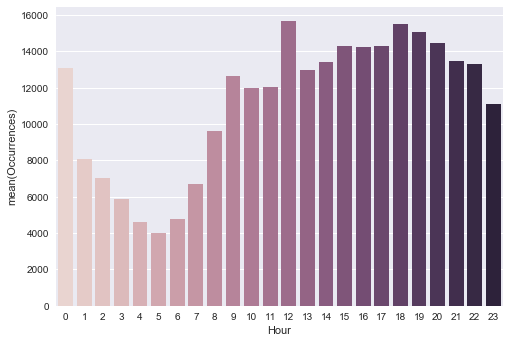

In [8]:
ax = sns.barplot(x = crimes_time['Hour'], y = crimes_time['Occurrences'], palette = sns.cubehelix_palette(24))
plt.show(ax)

## Tipos de crime mais comuns

In [9]:
#print(crimes_upd['Primary Type'].value_counts())

value_size = crimes_upd.groupby(['Crime Time', 'Primary Type']).size()
source_list = value_size.copy().index.tolist()
hour, kind = zip(*source_list)
crimes_type_hour = pd.DataFrame(list(zip(hour, kind, value_size.tolist())), columns = ['Hour', 'Type', 'Occurrences'])
crimes_type_hour = crimes_type_hour.sort_values(['Hour'], ascending = True).reset_index(drop = True)
crimes_type_hour

,Hour,Type,Occurrences
0,0,ARSON,36
1,0,WEAPONS VIOLATION,179
2,0,THEFT,2341
3,0,STALKING,10
4,0,SEX OFFENSE,141
5,0,ROBBERY,633
6,0,PUBLIC PEACE VIOLATION,41
7,0,PROSTITUTION,34
8,0,OTHER OFFENSE,801
9,0,OFFENSE INVOLVING CHILDREN,338


In [10]:
aux = 0
maxi = 0
maxi2 = 0
maxi3 = 0
crime = ""
crime2 = ""
crime3 = ""
hour_crime = []

for row in crimes_type_hour.itertuples(index = False):
    if aux != row[0]:
        hour_crime.append((aux, crime, maxi, crime2, maxi2, crime3, maxi3))
        maxi = 0
        maxi2 = 0
        maxi3 = 0
        aux = row[0]
    if row[2] > maxi:
        maxi3 = maxi2
        maxi2 = maxi
        maxi = row[2]
        crime3 = crime2
        crime2 = crime
        crime = row[1]
    elif row[2] > maxi2:
        maxi3 = maxi2
        maxi2 = row[2]
        crime3 = crime2
        crime2 = row[1]
    elif row[2] > maxi3:
        maxi3 = row[2]
        crime3 = row[1]
hour_crime.append((aux, crime, maxi, crime2, maxi2, crime3, maxi3))

most_common_crime = pd.DataFrame(hour_crime, columns = ['Hour', '1st Crime', '1st Number', '2nd Crime', '2nd Number', '3rd Crime', '3rd Number'])
most_common_crime

,Hour,1st Crime,1st Number,2nd Crime,2nd Number,3rd Crime,3rd Number
0,0,BATTERY,2486,THEFT,2341,CRIMINAL DAMAGE,1764
1,1,BATTERY,2264,THEFT,1445,CRIMINAL DAMAGE,1190
2,2,BATTERY,2087,THEFT,1226,CRIMINAL DAMAGE,1072
3,3,BATTERY,1696,THEFT,957,CRIMINAL DAMAGE,924
4,4,BATTERY,1300,THEFT,778,CRIMINAL DAMAGE,778
5,5,BATTERY,923,THEFT,739,CRIMINAL DAMAGE,618
6,6,THEFT,989,BATTERY,876,CRIMINAL DAMAGE,711
7,7,THEFT,1442,BATTERY,1125,CRIMINAL DAMAGE,827
8,8,THEFT,2154,BATTERY,1538,CRIMINAL DAMAGE,1050
9,9,THEFT,2633,DECEPTIVE PRACTICE,2336,BATTERY,1773


## Horário com mais prisões concretizadas

In [11]:
value_size = crimes_upd.groupby(['Crime Time', 'Arrest']).size()
#print(value_size)
source_list = value_size.copy().index.tolist()
hour, arrest = zip(*source_list)
crimes_arrest_hour = pd.DataFrame(list(zip(hour, arrest, value_size.tolist())), columns = ['Hour', 'Arrest', 'Occurrences'])
crimes_arrest_hour = crimes_arrest_hour.sort_values(['Hour'], ascending = True).reset_index(drop = True)
crimes_arrest_hour

,Hour,Arrest,Occurrences
0,0,0,11035
1,0,1,2036
2,1,0,6542
3,1,1,1543
4,2,0,5782
5,2,1,1240
6,3,0,4900
7,3,1,967
8,4,0,3967
9,4,1,666


In [12]:
skip = False
num_zero = 0
num_one = 0
lista = []
for row in crimes_arrest_hour.itertuples(index = False):
    if skip:
        if row[1] == 1:
            num_one = row[2]
        else:
            num_zero = row[2]
        lista.append((row[0], num_one/(num_one + num_zero)))
        skip = False
        continue   
    else:
        skip = True
        if row[1] == 1:
            num_one = row[2]
        else:
            num_zero = row[2]
data = pd.DataFrame(lista, columns = ['Hour', 'Arrest Percentage'])
data

,Hour,Arrest Percentage
0,0,0.155765
1,1,0.190847
2,2,0.176588
3,3,0.164820
4,4,0.143751
5,5,0.126937
6,6,0.161567
7,7,0.156637
8,8,0.147832
9,9,0.133275


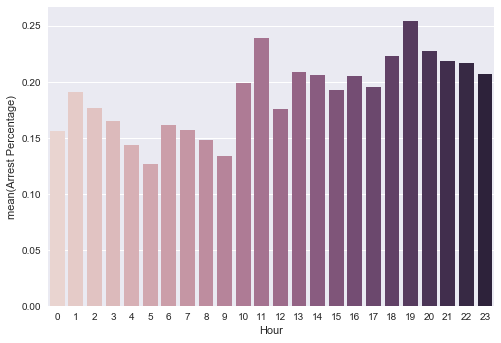

In [13]:
ax = sns.barplot(x = data['Hour'], y = data['Arrest Percentage'], palette = sns.cubehelix_palette(24))
plt.show(ax)

## Horário com mais crimes domésticos

In [14]:
value_size = crimes_upd.groupby(['Crime Time', 'Domestic']).size()
#print(value_size)
source_list = value_size.copy().index.tolist()
hour, arrest = zip(*source_list)
crimes_domestic_hour = pd.DataFrame(list(zip(hour, arrest, value_size.tolist())), columns = ['Hour', 'Domestic', 'Occurrences'])
crimes_domestic_hour = crimes_domestic_hour.sort_values(['Hour'], ascending = True).reset_index(drop = True)
crimes_domestic_hour

,Hour,Domestic,Occurrences
0,0,0,10766
1,0,1,2305
2,1,0,6344
3,1,1,1741
4,2,0,5426
5,2,1,1596
6,3,0,4574
7,3,1,1293
8,4,0,3584
9,4,1,1049


In [15]:
hours_list_domestic = []
occurrences_list_domestic = []
for i in range(len(crimes_domestic_hour)):
    if crimes_domestic_hour['Domestic'][i] == 1:
        hours_list_domestic.append(crimes_domestic_hour['Hour'][i])
        occurrences_list_domestic.append(crimes_domestic_hour['Occurrences'][i])
occurrences_domestic_hour = pd.DataFrame(list(zip(hours_list_domestic, occurrences_list_domestic)), columns = ['Hour', 'Domestic_Occurrences'])
occurrences_domestic_hour

,Hour,Domestic_Occurrences
0,0,2305
1,1,1741
2,2,1596
3,3,1293
4,4,1049
5,5,847
6,6,918
7,7,1194
8,8,1613
9,9,1968


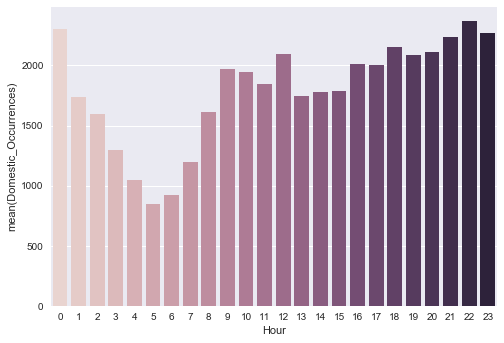

In [16]:
ax = sns.barplot(x = occurrences_domestic_hour['Hour'], y = occurrences_domestic_hour['Domestic_Occurrences'], palette = sns.cubehelix_palette(24))
plt.show(ax)

## Horários com maior porcentagem de crimes domésticos

In [17]:
skip = False
num_zero = 0
num_one = 0
lista = []
for row in crimes_domestic_hour.itertuples(index = False):
    if skip:
        if row[1] == 1:
            num_one = row[2]
        else:
            num_zero = row[2]
        lista.append((row[0], num_one/(num_one + num_zero)))
        skip = False
        continue   
    else:
        skip = True
        if row[1] == 1:
            num_one = row[2]
        else:
            num_zero = row[2]
data_domestic = pd.DataFrame(lista, columns = ['Hour', 'Domestic Percentage'])
data_domestic

,Hour,Domestic Percentage
0,0,0.176345
1,1,0.215337
2,2,0.227286
3,3,0.220385
4,4,0.226419
5,5,0.211644
6,6,0.192372
7,7,0.178289
8,8,0.168161
9,9,0.155844


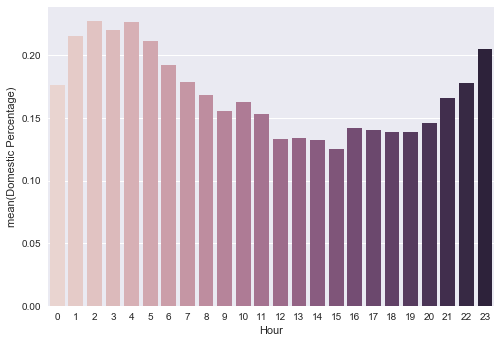

In [18]:
ax = sns.barplot(x = data_domestic['Hour'], y = data_domestic['Domestic Percentage'], palette = sns.cubehelix_palette(24))
plt.show(ax)

## Comparação entre crimes domésticos e não-domésticos

In [19]:
hours_list_not_domestic = []
occurrences_list_not_domestic = []
for i in range(len(crimes_domestic_hour)):
    if crimes_domestic_hour['Domestic'][i] == 0:
        hours_list_not_domestic.append(crimes_domestic_hour['Hour'][i])
        occurrences_list_not_domestic.append(crimes_domestic_hour['Occurrences'][i])
occurrences_not_domestic_hour = pd.DataFrame(list(zip(hours_list_not_domestic, occurrences_list_not_domestic)), columns = ['Hour', 'Non_Domestic_Occurrences'])
occurrences_not_domestic_hour

,Hour,Non_Domestic_Occurrences
0,0,10766
1,1,6344
2,2,5426
3,3,4574
4,4,3584
5,5,3155
6,6,3854
7,7,5503
8,8,7979
9,9,10660


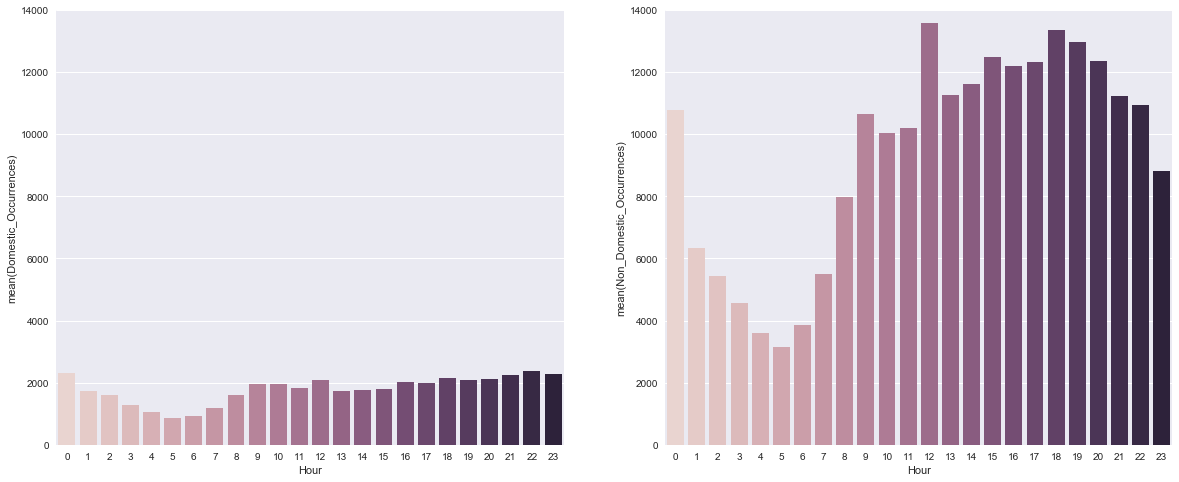

In [20]:
fig, axes = plt.subplots(1,2,figsize=(20,8))
sns.barplot(x = occurrences_domestic_hour['Hour'], y = occurrences_domestic_hour['Domestic_Occurrences'], palette = sns.cubehelix_palette(24), ax=axes[0])
sns.barplot(x = occurrences_not_domestic_hour['Hour'], y = occurrences_not_domestic_hour['Non_Domestic_Occurrences'], palette = sns.cubehelix_palette(24), ax=axes[1])
axes[0].set(ylim=(0, 14000))
axes[1].set(ylim=(0, 14000))
plt.show(fig)

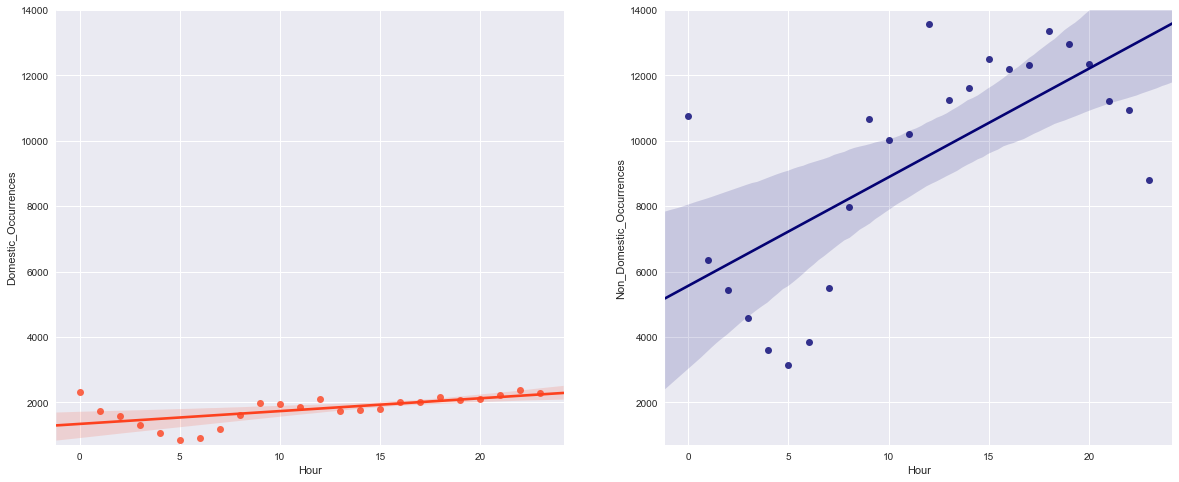

In [21]:
fig, axes = plt.subplots(1,2,figsize=(20,8))
sns.regplot(x = occurrences_domestic_hour['Hour'], y = occurrences_domestic_hour['Domestic_Occurrences'], color=sns.xkcd_rgb["orange red"], ax=axes[0])
sns.regplot(x = occurrences_not_domestic_hour['Hour'], y = occurrences_not_domestic_hour['Non_Domestic_Occurrences'], color=sns.xkcd_rgb["deep blue"], ax=axes[1])
axes[0].set(ylim=(700, 14000))
axes[1].set(ylim=(700, 14000))
plt.show(fig)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import linregress, t
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [24]:
model = smf.ols("Domestic_Occurrences ~ Hour",data=occurrences_domestic_hour)
result = model.fit()
pd.concat([result.params,result.bse,result.tvalues,result.pvalues],
          axis=1, keys=['coef','SE','t','p-value'])

,coef,SE,t,p-value
Intercept,1338.726667,138.736420,9.649425,2.301532e-09
Hour,39.223043,10.336018,3.794792,9.935628e-04


In [25]:
model = smf.ols("Non_Domestic_Occurrences ~ Hour",data=occurrences_not_domestic_hour)
result = model.fit()
pd.concat([result.params,result.bse,result.tvalues,result.pvalues],
          axis=1, keys=['coef','SE','t','p-value'])

,coef,SE,t,p-value
Intercept,5563.063333,1004.272922,5.539394,0.000014
Hour,332.175652,74.819453,4.439696,0.000206


# Fazendo as análises iniciais, mas desconsiderando crimes domésticos

## Horários com mais crimes

In [26]:
crimes_nd = crimes_upd.copy()
crimes_nd = crimes_nd.drop(crimes_nd[crimes_nd.Domestic == 1].index)
crimes_nd = crimes_nd.reset_index(drop=True)
crimes_nd

,Date,Primary Type,Location Description,Arrest,Domestic,Community Area,FBI Code,Location,Crime Time
0,05/03/2016 09:00:00 PM,NARCOTICS,SIDEWALK,1,0,26,18,"(41.880658176, -87.731212135)",21
1,05/03/2016 03:00:00 PM,ROBBERY,SIDEWALK,0,0,69,03,"(41.766961034, -87.620152116)",15
2,05/03/2016 10:02:00 PM,OTHER OFFENSE,STREET,1,0,27,26,"(41.882087429, -87.711041964)",22
3,05/03/2016 03:30:00 PM,ASSAULT,SIDEWALK,0,0,26,08A,"(41.874865643, -87.720427367)",15
4,05/03/2016 09:09:00 PM,THEFT,APARTMENT,1,0,40,06,"(41.780946398, -87.621995369)",21
5,05/03/2016 09:42:00 PM,NARCOTICS,SIDEWALK,1,0,42,18,"(41.784917834, -87.613257846)",21
6,05/03/2016 10:15:00 PM,BATTERY,BAR OR TAVERN,0,0,68,04B,"(41.758438955, -87.653943807)",22
7,05/03/2016 09:30:00 AM,CRIMINAL DAMAGE,POLICE FACILITY/VEH PARKING LOT,0,0,29,14,"(41.856790413, -87.708424071)",9
8,05/03/2016 09:15:00 PM,CRIMINAL DAMAGE,STREET,0,0,76,14,"(41.973712278, -87.845720835)",21
9,05/03/2016 07:30:00 AM,DECEPTIVE PRACTICE,OTHER,0,0,17,11,"(41.946619877, -87.782293553)",7


In [27]:
value_countnd = crimes_nd['Crime Time'].value_counts()
crimes_timend = pd.DataFrame(list(zip(value_countnd.index.tolist(), value_countnd.tolist())), columns = ['Hour', 'Occurrences'])
crimes_timend = crimes_timend.sort_values(['Hour'], ascending = True).reset_index(drop = True)
crimes_timend

,Hour,Occurrences
0,0,10766
1,1,6344
2,2,5426
3,3,4574
4,4,3584
5,5,3155
6,6,3854
7,7,5503
8,8,7979
9,9,10660


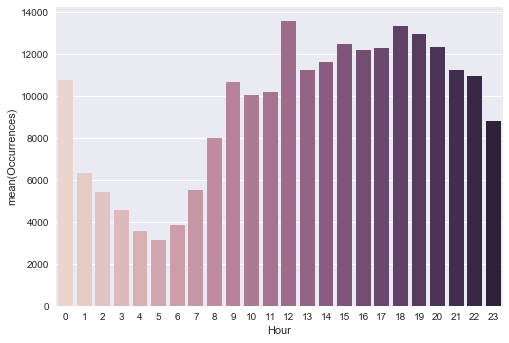

In [28]:
ax = sns.barplot(x = crimes_timend['Hour'], y = crimes_timend['Occurrences'], palette = sns.cubehelix_palette(24))
plt.show(ax)

## Tipos de crimes mais comuns

In [29]:
value_sizend = crimes_nd.groupby(['Crime Time', 'Primary Type']).size()
source_listnd = value_sizend.copy().index.tolist()
hournd, kindnd = zip(*source_listnd)
crimes_type_hournd = pd.DataFrame(list(zip(hournd, kindnd, value_sizend.tolist())), columns = ['Hour', 'Type', 'Occurrences'])
crimes_type_hournd = crimes_type_hournd.sort_values(['Hour'], ascending = True).reset_index(drop = True)
crimes_type_hournd

,Hour,Type,Occurrences
0,0,ARSON,33
1,0,WEAPONS VIOLATION,178
2,0,THEFT,2235
3,0,STALKING,2
4,0,SEX OFFENSE,113
5,0,ROBBERY,629
6,0,PUBLIC PEACE VIOLATION,40
7,0,PROSTITUTION,34
8,0,OTHER OFFENSE,530
9,0,OFFENSE INVOLVING CHILDREN,215


In [30]:
aux = 0
maxi = 0
maxi2 = 0
maxi3 = 0
crime = ""
crime2 = ""
crime3 = ""
hour_crimend = []

for row in crimes_type_hournd.itertuples(index = False):
    if aux != row[0]:
        hour_crimend.append((aux, crime, maxi, crime2, maxi2, crime3, maxi3))
        maxi = 0
        maxi2 = 0
        maxi3 = 0
        aux = row[0]
    if row[2] > maxi:
        maxi3 = maxi2
        maxi2 = maxi
        maxi = row[2]
        crime3 = crime2
        crime2 = crime
        crime = row[1]
    elif row[2] > maxi2:
        maxi3 = maxi2
        maxi2 = row[2]
        crime3 = crime2
        crime2 = row[1]
    elif row[2] > maxi3:
        maxi3 = row[2]
        crime3 = row[1]
hour_crimend.append((aux, crime, maxi, crime2, maxi2, crime3, maxi3))

most_common_crimend = pd.DataFrame(hour_crimend, columns = ['Hour', '1st Crime', '1st Number', '2nd Crime', '2nd Number', '3rd Crime', '3rd Number'])
most_common_crimend

,Hour,1st Crime,1st Number,2nd Crime,2nd Number,3rd Crime,3rd Number
0,0,THEFT,2235,DECEPTIVE PRACTICE,1676,CRIMINAL DAMAGE,1592
1,1,THEFT,1361,BATTERY,1130,CRIMINAL DAMAGE,1021
2,2,THEFT,1154,BATTERY,1023,CRIMINAL DAMAGE,927
3,3,THEFT,887,BATTERY,835,CRIMINAL DAMAGE,801
4,4,THEFT,720,CRIMINAL DAMAGE,664,BATTERY,602
5,5,THEFT,695,CRIMINAL DAMAGE,529,BATTERY,384
6,6,THEFT,931,CRIMINAL DAMAGE,625,BURGLARY,424
7,7,THEFT,1372,CRIMINAL DAMAGE,744,BURGLARY,698
8,8,THEFT,2063,CRIMINAL DAMAGE,922,DECEPTIVE PRACTICE,920
9,9,THEFT,2500,DECEPTIVE PRACTICE,2313,CRIMINAL DAMAGE,1002


Nota-se que "Battery" perde muita importância nesse novo ranking. Battery é crime de agressão física, que é bem característico do crime doméstico. A frequência de ocorrências de Battery nos crimes domésticos é alta a ponto de colocar o crime como o mais comum em determinadas horas do dia. Mas não é tão comum assim na rua, onde "Theft" domina todos os horários no ranking apenas de crimes não-domésticos.

In [31]:
value_sizend = crimes_nd.groupby(['Crime Time', 'Arrest']).size()
#print(value_size)
source_listnd = value_sizend.copy().index.tolist()
hournd, arrestnd = zip(*source_listnd)
crimes_arrest_hournd = pd.DataFrame(list(zip(hournd, arrestnd, value_sizend.tolist())), columns = ['Hour', 'Arrest', 'Occurrences'])
crimes_arrest_hournd = crimes_arrest_hournd.sort_values(['Hour'], ascending = True).reset_index(drop = True)
crimes_arrest_hournd

,Hour,Arrest,Occurrences
0,0,0,9172
1,0,1,1594
2,1,0,5197
3,1,1,1147
4,2,0,4548
5,2,1,878
6,3,0,3844
7,3,1,730
8,4,0,3126
9,4,1,458


In [33]:
skip = False
num_zero = 0
num_one = 0
listand = []
for row in crimes_arrest_hournd.itertuples(index = False):
    if skip:
        if row[1] == 1:
            num_one = row[2]
        else:
            num_zero = row[2]
        listand.append((row[0], num_one/(num_one + num_zero)))
        skip = False
        continue   
    else:
        skip = True
        if row[1] == 1:
            num_one = row[2]
        else:
            num_zero = row[2]
datand = pd.DataFrame(listand, columns = ['Hour', 'Arrest Percentage'])
datand

,Hour,Arrest Percentage
0,0,0.148059
1,1,0.180801
2,2,0.161813
3,3,0.159598
4,4,0.127790
5,5,0.107132
6,6,0.157499
7,7,0.147738
8,8,0.146886
9,9,0.130957


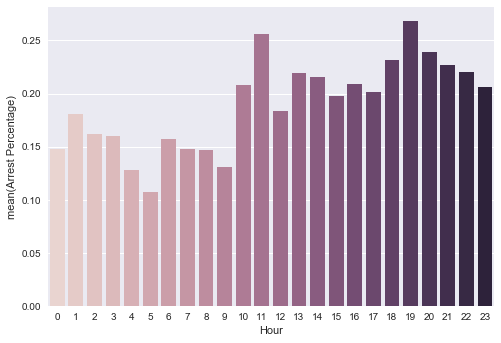

In [34]:
ax = sns.barplot(x = datand['Hour'], y = datand['Arrest Percentage'], palette = sns.cubehelix_palette(24))
plt.show(ax)

A diferença para o primeiro gráfico não é significativa, mas os índices sobem um pouco durante a tarde e a noite e são um pouco menores durante a madrugada e a manhã. Ou seja, podemos ver que retirar os crimes domésticos da análise, muda os resultados, mas pela baixa quantidade de crimes domésticos em comparação com o resto dos crimes essa mudança não é muito significativa

## Regiões Mais Perigosas

### Crimes mais comuns por região/Região com mais prisões/Regiões com mais crimes domésticos/Relação entre escolas e criminalidade

In [35]:
import matplotlib.cm
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

In [36]:
def def_lat(row):
    if pd.isnull(row[7]) == False:
        ycord = float(tuple(row[7].split(', '))[0].split('(')[1])
        return ycord
        
def def_lon(row):
    if pd.isnull(row[7]) == False:
        xcord = float(tuple(row[7].split(', '))[1].split(')')[0]) 
        return xcord

In [38]:
lat = list(map(def_lat, crimes_upd.itertuples(index = False)))
lon = list(map(def_lon, crimes_upd.itertuples(index = False)))
crimes_upd['Lat'] = lat
crimes_upd['Lon'] = lon

In [39]:
crimes_upd.head()

,Date,Primary Type,Location Description,Arrest,Domestic,Community Area,FBI Code,Location,Crime Time,Lat,Lon
0,05/03/2016 09:00:00 PM,NARCOTICS,SIDEWALK,1,0,26,18,"(41.880658176, -87.731212135)",21,41.880658,-87.731212
1,05/03/2016 09:35:00 PM,THEFT,APARTMENT,0,1,65,06,"(41.77414081, -87.726307093)",21,41.774141,-87.726307
2,05/03/2016 02:45:00 PM,ASSAULT,STREET,0,1,61,08A,"(41.811697721, -87.675214316)",14,41.811698,-87.675214
3,05/03/2016 06:42:00 PM,BATTERY,SIDEWALK,0,1,66,08B,"(41.778661058, -87.68227253)",18,41.778661,-87.682273
4,05/03/2016 03:00:00 PM,ROBBERY,SIDEWALK,0,0,69,03,"(41.766961034, -87.620152116)",15,41.766961,-87.620152


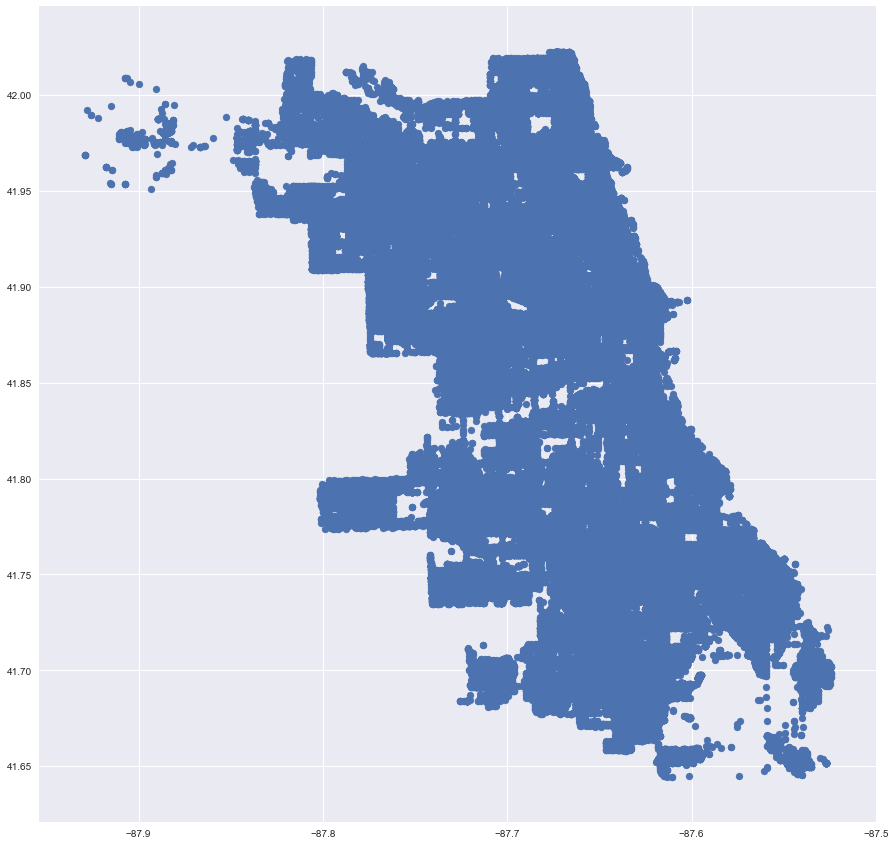

In [46]:
fig, ax = plt.subplots(figsize=(15,15))
plt.scatter(y=crimes_upd['Lat'],x=crimes_upd['Lon'])
plt.show()

In [232]:
crimes_upd.head()

,Date,Primary Type,Location Description,Arrest,Domestic,Community Area,FBI Code,Location,Crime Time,Lat,Lon
0,05/03/2016 09:00:00 PM,NARCOTICS,SIDEWALK,1,0,26,18,"(41.880658176, -87.731212135)",21,41.880658,-87.731212
1,05/03/2016 09:35:00 PM,THEFT,APARTMENT,0,1,65,06,"(41.77414081, -87.726307093)",21,41.774141,-87.726307
2,05/03/2016 02:45:00 PM,ASSAULT,STREET,0,1,61,08A,"(41.811697721, -87.675214316)",14,41.811698,-87.675214
3,05/03/2016 06:42:00 PM,BATTERY,SIDEWALK,0,1,66,08B,"(41.778661058, -87.68227253)",18,41.778661,-87.682273
4,05/03/2016 03:00:00 PM,ROBBERY,SIDEWALK,0,0,69,03,"(41.766961034, -87.620152116)",15,41.766961,-87.620152
